# Practical 5

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv("Dataset/tweet_data.csv - tweet_data.csv.csv")
df.head()

,textID,tweet_text,sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative
1,1956967696,Funeral ceremony...gloomy friday...,negative
2,1956967789,wants to hang out with friends SOON!,positive
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative


## 1) Find the total number of tweets

In [38]:
len(df)

18727

## 2) Find the total number of unique tweets.

In [39]:
len(df['tweet_text'].unique())

18615

## 3) Find out the text and sentiments of a particular tweet with the help of IDs associated with it, as well as its index.

In [40]:
textId = int(input("Enter: "))
df[df['textID'] == textId]

Enter: 1956967789


,textID,tweet_text,sentiment
2,1956967789,wants to hang out with friends SOON!,positive


## << Preparing data >>

In [41]:
import nltk
import re

In [42]:
def tok(txt):
    txt2 = re.split('\W+', txt)
    
    return txt2

In [43]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: tok(x.lower()))
df.head()

,textID,tweet_text,sentiment
0,1956967666,"[layin, n, bed, with, a, headache, ughhhh, wai...",negative
1,1956967696,"[funeral, ceremony, gloomy, friday, ]",negative
2,1956967789,"[wants, to, hang, out, with, friends, soon, ]",positive
3,1956968477,"[re, pinging, ghostridah14, why, didn, t, you,...",negative
4,1956968636,"[hmmm, http, www, djhero, com, is, down]",negative


In [44]:
# Remove Stopwords
stopwords = nltk.corpus.stopwords.words('english')

def remSW(txt):
    txt2 = [word for word in txt if word not in stopwords]
    
    return txt2

Stemming means same meaningful, but different spelling. Whereas, Lemmatization is similar to stemming, but different verb phase

In [45]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Stemming
pS = PorterStemmer()
def stemming(txt):
    txt2 = [pS.stem(c) for c in txt]
    
    return txt2

# Lemmatization
wL = WordNetLemmatizer()
def lemma(txt):
    txt2 = [wL.lemmatize(w) for w in txt]
    
    return txt2

In [46]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: stemming(x))
df['tweet_text'] = df['tweet_text'].apply(lambda x: lemma(x))

df.head()

,textID,tweet_text,sentiment
0,1956967666,"[layin, n, bed, with, a, headach, ughhhh, wait...",negative
1,1956967696,"[funer, ceremoni, gloomi, friday, ]",negative
2,1956967789,"[want, to, hang, out, with, friend, soon, ]",positive
3,1956968477,"[re, ping, ghostridah14, whi, didn, t, you, go...",negative
4,1956968636,"[hmmm, http, www, djhero, com, is, down]",negative


## 4) Find out the total number of positive and negative tweets

In [47]:
print("Positive: ", len(df[df['sentiment'] == "positive"]))
print("Negative: ", len(df[df['sentiment'] == "negative"]))

Positive:  9897
Negative:  8830


## 5) Plot a graph that shows the above details(4) in percentage

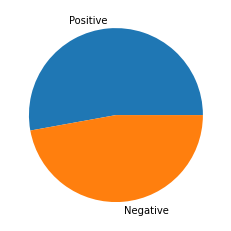

In [48]:
pos = len(df[df['sentiment'] == "positive"]) / len(df['sentiment'])
neg = len(df[df['sentiment'] == "negative"]) / len(df['sentiment'])

plt.pie([pos, neg], labels=["Positive", "Negative"])
plt.show()

## 6) Plot a word cloud that shows all the words that are most frequently used in positive  negative tweets.

In [49]:
import wordcloud

def showWC(df):
    txt = ' '.join(df['tweet_text'].astype(str).tolist())
    fig = wordcloud.WordCloud(background_color="black", colormap="Reds", width=1900, height=1300).generate(txt)
    
    plt.imshow(fig)

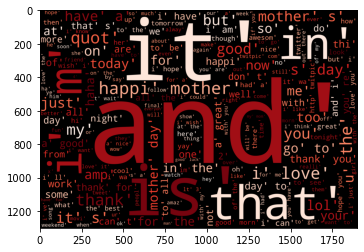

In [50]:
showWC(df[df['sentiment'] == "positive"])

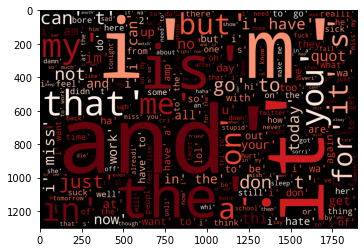

In [51]:
showWC(df[df['sentiment'] == "negative"])